<a id='banner-image'></a>

<img src='./images/house_banner.png'>

# Predicting Ames Housing Prices

**Shaun Chua**
<br> 12 August 2020

---

## Contents:
[**1. Importing Libraries**](#1)
<br> [**2. Importing Dataset**](#2)
<br> [**3. EDA and Data Cleaning** ](#3)
<br> &emsp;[3.1 Missing Data and Imputation](#3.1)
<br> &emsp;[3.2 Numerical Features](#3.2)
<br> &emsp;[3.3 Categorical Features](#3.3)
<br> [**4. Preprocessing**](#4)
<br> [**5. Modelling**](#5)
<br> [**6. Results and Discussion**](#6)
<br> [**7. Kaggle Submission**](#7)
<br> [**8. Credits**](#8)

 <a id='1'></a> 

# 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import scipy.stats as stats

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge, LassoCV, Lasso
from sklearn.metrics import mean_squared_error, explained_variance_score

# To ignore warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# To get notebook runtime
import time

%matplotlib inline

In [2]:
# Starting timer for notebook

t0 = time.time()

<a id='2'></a>

# 2. Importing Dataset

Dataset for this project was taken from the <a href='https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data'>House Prices: Advanced Regression Techniques</a> Kaggle Competition.

The original dataset intent can be found <a href='http://jse.amstat.org/v19n3/decock.pdf'>here</a>.

In [3]:
# Loading datasets

train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

<a id='3'></a>

# 3. EDA and Data Cleaning

In [176]:
# Checking training set

display(train)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave  None      Reg   
1        2          20       RL         80.0     9600   Pave  None      Reg   
2        3          60       RL         68.0    11250   Pave  None      IR1   
3        4          70       RL         60.0     9550   Pave  None      IR1   
4        5          60       RL         84.0    14260   Pave  None      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  1455          20       FV         62.0     7500   Pave  Pave      Reg   
1455  1456          60       RL         62.0     7917   Pave  None      Reg   
1456  1457          20       RL         85.0    13175   Pave  None      Reg   
1458  1459          20       RL         68.0     9717   Pave  None      Reg   
1459  1460          20       RL         75.0     9937   Pave  None      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0   None   None        None       0   
1            Lvl    AllPub  ...        0   None   None        None       0   
2            Lvl    AllPub  ...        0   None   None        None       0   
3            Lvl    AllPub  ...        0   None   None        None       0   
4            Lvl    AllPub  ...        0   None   None        None       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1454         Lvl    AllPub  ...        0   None   None        None       0   
1455         Lvl    AllPub  ...        0   None   None        None       0   
1456         Lvl    AllPub  ...        0   None  MnPrv        None       0   
1458         Lvl    AllPub  ...        0   None   None        None       0   
1459         Lvl    AllPub  ...        0   None   None        None       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1454     10   2009        WD         Normal     185000  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1299 rows x 78 columns]

In [5]:
# Checking training set shape

train.shape

(1460, 81)

In [6]:
# Checking info for training set

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Checking descriptive stats for numerical features in training set

print(f'Shape: {train.describe().T.shape}')
train.describe().T

Shape: (38, 8)


count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [8]:
# Checking descriptive stats for categorical features in training set

print(train.describe(include = ['O']).T.shape)
train.describe(include = ['O']).T

(43, 4)


count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType     1452      4     None   864
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

In [9]:
# Checking for null values in training set 

for feature in train.columns:
    print(f'{train[feature].isnull().sum()} null values were found for the {feature} feature.')

print('----------------------------------------------------------') 
print(f'There are a total of {train.isnull().sum().sum()} null values in the training set.')

0 null values were found for the Id feature.
0 null values were found for the MSSubClass feature.
0 null values were found for the MSZoning feature.
259 null values were found for the LotFrontage feature.
0 null values were found for the LotArea feature.
0 null values were found for the Street feature.
1369 null values were found for the Alley feature.
0 null values were found for the LotShape feature.
0 null values were found for the LandContour feature.
0 null values were found for the Utilities feature.
0 null values were found for the LotConfig feature.
0 null values were found for the LandSlope feature.
0 null values were found for the Neighborhood feature.
0 null values were found for the Condition1 feature.
0 null values were found for the Condition2 feature.
0 null values were found for the BldgType feature.
0 null values were found for the HouseStyle feature.
0 null values were found for the OverallQual feature.
0 null values were found for the OverallCond feature.
0 null valu

In [10]:
# Checking test dataset

test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub  ...         120        0    NaN  MnPrv   
1            Lvl    AllPub  ...           0        0    NaN    NaN   
2            Lvl    AllPub  ...           0        0    NaN  MnPrv   
3            Lvl    AllPub  ...           0        0    NaN    NaN   
4            HLS    AllPub  ...         144        0    NaN    NaN   
...          ...       ...  ...         ...      ...    ...    ...   
1454         Lvl    AllPub  ...           0        0    NaN    NaN   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN    NaN   
1457         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

In [11]:
# Checking test set shape

test.shape

(1459, 80)

In [12]:
# Checking info for test set

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [13]:
# Checking descriptive stats for numerical features in test set

print(f'Shape: {test.describe().T.shape}')
test.describe().T

Shape: (37, 8)


count         mean          std     min      25%     50%  \
Id             1459.0  2190.000000   421.321334  1461.0  1825.50  2190.0   
MSSubClass     1459.0    57.378341    42.746880    20.0    20.00    50.0   
LotFrontage    1232.0    68.580357    22.376841    21.0    58.00    67.0   
LotArea        1459.0  9819.161069  4955.517327  1470.0  7391.00  9399.0   
OverallQual    1459.0     6.078821     1.436812     1.0     5.00     6.0   
OverallCond    1459.0     5.553804     1.113740     1.0     5.00     5.0   
YearBuilt      1459.0  1971.357779    30.390071  1879.0  1953.00  1973.0   
YearRemodAdd   1459.0  1983.662783    21.130467  1950.0  1963.00  1992.0   
MasVnrArea     1444.0   100.709141   177.625900     0.0     0.00     0.0   
BsmtFinSF1     1458.0   439.203704   455.268042     0.0     0.00   350.5   
BsmtFinSF2     1458.0    52.619342   176.753926     0.0     0.00     0.0   
BsmtUnfSF      1458.0   554.294925   437.260486     0.0   219.25   460.0   
TotalBsmtSF    1458.0  1046.117970   442.898624     0.0   784.00   988.0   
1stFlrSF       1459.0  1156.534613   398.165820   407.0   873.50  1079.0   
2ndFlrSF       1459.0   325.967786   420.610226     0.0     0.00     0.0   
LowQualFinSF   1459.0     3.543523    44.043251     0.0     0.00     0.0   
GrLivArea      1459.0  1486.045922   485.566099   407.0  1117.50  1432.0   
BsmtFullBath   1457.0     0.434454     0.530648     0.0     0.00     0.0   
BsmtHalfBath   1457.0     0.065202     0.252468     0.0     0.00     0.0   
FullBath       1459.0     1.570939     0.555190     0.0     1.00     2.0   
HalfBath       1459.0     0.377656     0.503017     0.0     0.00     0.0   
BedroomAbvGr   1459.0     2.854010     0.829788     0.0     2.00     3.0   
KitchenAbvGr   1459.0     1.042495     0.208472     0.0     1.00     1.0   
TotRmsAbvGrd   1459.0     6.385195     1.508895     3.0     5.00     6.0   
Fireplaces     1459.0     0.581220     0.647420     0.0     0.00     0.0   
GarageYrBlt    1381.0  1977.721217    26.431175  1895.0  1959.00  1979.0   
GarageCars     1458.0     1.766118     0.775945     0.0     1.00     2.0   
GarageArea     1458.0   472.768861   217.048611     0.0   318.00   480.0   
WoodDeckSF     1459.0    93.174777   127.744882     0.0     0.00     0.0   
OpenPorchSF    1459.0    48.313914    68.883364     0.0     0.00    28.0   
EnclosedPorch  1459.0    24.243317    67.227765     0.0     0.00     0.0   
3SsnPorch      1459.0     1.794380    20.207842     0.0     0.00     0.0   
ScreenPorch    1459.0    17.064428    56.609763     0.0     0.00     0.0   
PoolArea       1459.0     1.744345    30.491646     0.0     0.00     0.0   
MiscVal        1459.0    58.167923   630.806978     0.0     0.00     0.0   
MoSold         1459.0     6.104181     2.722432     1.0     4.00     6.0   
YrSold         1459.0  2007.769705     1.301740  2006.0  2007.00  2008.0   

                    75%      max  
Id              2554.50   2919.0  
MSSubClass        70.00    190.0  
LotFrontage       80.00    200.0  
LotArea        11517.50  56600.0  
OverallQual        7.00     10.0  
OverallCond        6.00      9.0  
YearBuilt       2001.00   2010.0  
YearRemodAdd    2004.00   2010.0  
MasVnrArea       164.00   1290.0  
BsmtFinSF1       753.50   4010.0  
BsmtFinSF2         0.00   1526.0  
BsmtUnfSF        797.75   2140.0  
TotalBsmtSF     1305.00   5095.0  
1stFlrSF        1382.50   5095.0  
2ndFlrSF         676.00   1862.0  
LowQualFinSF       0.00   1064.0  
GrLivArea       1721.00   5095.0  
BsmtFullBath       1.00      3.0  
BsmtHalfBath       0.00      2.0  
FullBath           2.00      4.0  
HalfBath           1.00      2.0  
BedroomAbvGr       3.00      6.0  
KitchenAbvGr       1.00      2.0  
TotRmsAbvGrd       7.00     15.0  
Fireplaces         1.00      4.0  
GarageYrBlt     2002.00   2207.0  
GarageCars         2.00      5.0  
GarageArea       576.00   1488.0  
WoodDeckSF       168.00   1424.0  
OpenPorchSF       72.00    742.0  
EnclosedPorch      0.00   1012.0  
3SsnPor

In [14]:
# Checking descriptive stats for categorical features in test set

print(test.describe(include = ['O']).T.shape)
test.describe(include = ['O']).T

(43, 4)


count unique      top  freq
MSZoning       1455      5       RL  1114
Street         1459      2     Pave  1453
Alley           107      2     Grvl    70
LotShape       1459      4      Reg   934
LandContour    1459      4      Lvl  1311
Utilities      1457      1   AllPub  1457
LotConfig      1459      5   Inside  1081
LandSlope      1459      3      Gtl  1396
Neighborhood   1459     25    NAmes   218
Condition1     1459      9     Norm  1251
Condition2     1459      5     Norm  1444
BldgType       1459      5     1Fam  1205
HouseStyle     1459      7   1Story   745
RoofStyle      1459      6    Gable  1169
RoofMatl       1459      4  CompShg  1442
Exterior1st    1458     13  VinylSd   510
Exterior2nd    1458     15  VinylSd   510
MasVnrType     1443      4     None   878
ExterQual      1459      4       TA   892
ExterCond      1459      5       TA  1256
Foundation     1459      6    PConc   661
BsmtQual       1415      4       TA   634
BsmtCond       1414      4       TA  1295
BsmtExposure   1415      4       No   951
BsmtFinType1   1417      6      GLQ   431
BsmtFinType2   1417      6      Unf  1237
Heating        1459      4     GasA  1446
HeatingQC      1459      5       Ex   752
CentralAir     1459      2        Y  1358
Electrical     1459      4    SBrkr  1337
KitchenQual    1458      4       TA   757
Functional     1457      7      Typ  1357
FireplaceQu     729      5       Gd   364
GarageType     1383      6   Attchd   853
GarageFinish   1381      3      Unf   625
GarageQual     1381      4       TA  1293
GarageCond     1381      5       TA  1328
PavedDrive     1459      3        Y  1301
PoolQC            3      2       Ex     2
Fence           290      4    MnPrv   172
MiscFeature      51      3     Shed    46
SaleType       1458      9       WD  1258
SaleCondition  1459      6   Normal  1204

In [15]:
# Checking for null values in test set

for feature in test.columns:
    print(f'{test[feature].isnull().sum()} null values were found for the {feature} feature.')

print('--------------------------------------------------------') 
print(f'There are a total of {test.isnull().sum().sum()} null values in the test set.')

0 null values were found for the Id feature.
0 null values were found for the MSSubClass feature.
4 null values were found for the MSZoning feature.
227 null values were found for the LotFrontage feature.
0 null values were found for the LotArea feature.
0 null values were found for the Street feature.
1352 null values were found for the Alley feature.
0 null values were found for the LotShape feature.
0 null values were found for the LandContour feature.
2 null values were found for the Utilities feature.
0 null values were found for the LotConfig feature.
0 null values were found for the LandSlope feature.
0 null values were found for the Neighborhood feature.
0 null values were found for the Condition1 feature.
0 null values were found for the Condition2 feature.
0 null values were found for the BldgType feature.
0 null values were found for the HouseStyle feature.
0 null values were found for the OverallQual feature.
0 null values were found for the OverallCond feature.
0 null valu

### **Comments:**
---

There seems to be quite a lot of missing data from both the train set and the test set. I will first look into the missing data, before deciding how to carry out imputation.

<a id='3.1'></a>

# 3.1 Missing Data and Imputation

## Missing Data Visualisation

In [16]:
# Creating dataframes for missing data in train and test set

train_nulls = pd.DataFrame(data=train.isnull().sum()[train.isnull().sum()>0], columns=['Missing Data'])
test_nulls = pd.DataFrame(data=test.isnull().sum()[test.isnull().sum()>0], columns=['Missing Data'])

In [17]:
# Sorting dataframes by missing data count

train_nulls.sort_values(by='Missing Data', ascending=False, inplace=True)
test_nulls.sort_values(by='Missing Data', ascending=False, inplace=True)

In [18]:
# Viewing train_nulls
train_nulls

Missing Data
PoolQC                1453
MiscFeature           1406
Alley                 1369
Fence                 1179
FireplaceQu            690
LotFrontage            259
GarageType              81
GarageYrBlt             81
GarageFinish            81
GarageQual              81
GarageCond              81
BsmtExposure            38
BsmtFinType2            38
BsmtFinType1            37
BsmtCond                37
BsmtQual                37
MasVnrArea               8
MasVnrType               8
Electrical               1

In [19]:
# Viewing test_nulls
test_nulls

Missing Data
PoolQC                1456
MiscFeature           1408
Alley                 1352
Fence                 1169
FireplaceQu            730
LotFrontage            227
GarageCond              78
GarageYrBlt             78
GarageQual              78
GarageFinish            78
GarageType              76
BsmtCond                45
BsmtExposure            44
BsmtQual                44
BsmtFinType1            42
BsmtFinType2            42
MasVnrType              16
MasVnrArea              15
MSZoning                 4
BsmtFullBath             2
BsmtHalfBath             2
Functional               2
Utilities                2
GarageCars               1
GarageArea               1
TotalBsmtSF              1
KitchenQual              1
BsmtUnfSF                1
BsmtFinSF2               1
BsmtFinSF1               1
Exterior2nd              1
Exterior1st              1
SaleType                 1

In [20]:
# Plotting Missing Data via plotly

fig = go.Figure(data = [go.Bar(name='train_null', x=train_nulls.index, y=train_nulls['Missing Data'], marker_color='green'),
                        go.Bar(name='test_null', x=test_nulls.index, y=test_nulls['Missing Data'], marker_color='lightgreen')],
                layout = dict(title='Null Values in Train and Test Set',
                              title_x=0.5)
            )

fig.update_layout(barmode='group')
#fig.show()

### Comments:
---
It appears that `PoolQC`, `MiscFeature`, `Alley`, `Fence`, and `FireplaceQu` each have an inordinate number of missing values, which may adversely affect machine learning. 

However, based on the <a href='http://jse.amstat.org/v19n3/decock/DataDocumentation.txt'>Data Documentation</a>, some missing values for the categorical features actually indicate the absence of a feature.

For instance, a missing value for `Alley` implies that the housing unit does not have alley access, not that the actual data is missing.

**I'll handle the "missing data" for the categorical features first.**

## Imputation for Categorical Features

In [21]:
# Getting categorical features

cat_features = train.select_dtypes(include=['O']).columns
cat_features

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [22]:
# Getting categorical features with missing values, for train and test set

train_cat_nulls = train.select_dtypes(include=['O']).isnull().sum()
test_cat_nulls = test.select_dtypes(include=['O']).isnull().sum()

In [23]:
# Setting mask for categorical features with at least 1 missing value, for train and test set

train_cat_nulls_mask = train.select_dtypes(include=['O']).isnull().sum() > 0
test_cat_nulls_mask = test.select_dtypes(include=['O']).isnull().sum() > 0

In [24]:
# Getting categorical features with missing values

cat_fillna = []

for feature in cat_features:
    # Appending feature if it has missing values, checking against train set 
    if feature in train_cat_nulls[train_cat_nulls_mask]:
        cat_fillna.append(feature)
    
    # Else, appending feature if it has missing values, checking against test set
    elif feature in test_cat_nulls[test_cat_nulls_mask]:
        cat_fillna.append(feature)
    
    else:
        pass 

In [25]:
# List of categorical features with missing values


print(f'There are {len(cat_fillna)} categorical features with missing values:')
print('------------------------------------------------------')
cat_fillna.sort()
cat_fillna

There are 23 categorical features with missing values:
------------------------------------------------------


['Alley',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'Electrical',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'KitchenQual',
 'MSZoning',
 'MasVnrType',
 'MiscFeature',
 'PoolQC',
 'SaleType',
 'Utilities']

In [26]:
# Imputing 'None' for columns of categorical features with 'missing data'

for feature in cat_fillna:
    train[feature].fillna('None', inplace=True)
    test[feature].fillna('None', inplace=True)

In [27]:
# Checking train set for missing values in categorical features

print(f'There are {train.select_dtypes(include=["O"]).isnull().sum().sum()} missing values for categorical features in the training set:')
print('------------------------------------------------------------------------')
print(train.select_dtypes(include=['O']).isnull().sum())

There are 0 missing values for categorical features in the training set:
------------------------------------------------------------------------
MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64


In [28]:
# Checking test set for missing values in categorical features

print(f'There are {test.select_dtypes(include=["O"]).isnull().sum().sum()} missing values for categorical features in the test set:')
print('--------------------------------------------------------------------')
print(test.select_dtypes(include=['O']).isnull().sum())

There are 0 missing values for categorical features in the test set:
--------------------------------------------------------------------
MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64


In [29]:
# Checking train set and test set for missing values

if train.isnull().sum().sum() == 0 and test.isnull().sum().sum() == 0:
    print('Imputation Completed')
    print('-----------------------------------------------------')
    print(f'There are {train.isnull().sum().sum()} missing values remaining in the train set.')
    print(f'There are {test.isnull().sum().sum()} missing values remaining in the test set.')

else: 
    print('Imputation Incomplete')
    print('-------------------------------------------------------')
    print(f'There are {train.isnull().sum().sum()} missing values remaining in the train set.')
    print(f'There are {test.isnull().sum().sum()} missing values remaining in the test set.')


Imputation Incomplete
-------------------------------------------------------
There are 348 missing values remaining in the train set.
There are 330 missing values remaining in the test set.


### Comments:
---
Missing values for categorical features have been handled. 

Evidently, the reamining missing values are those of numerical features, which I will now address.

## Imputation for Numerical Features 

In [30]:
# Getting numerical features

num_features = train.select_dtypes(exclude=['O']).columns
num_features

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [31]:
# Getting numerical features with missing values, for train and test set

train_num_nulls = train.select_dtypes(exclude=['O']).isnull().sum()
test_num_nulls = test.select_dtypes(exclude=['O']).isnull().sum()

In [32]:
# Setting mask for numerical features with at least 1 missing value, for train and test set

train_num_nulls_mask = train.select_dtypes(exclude=['O']).isnull().sum() > 0
test_num_nulls_mask = test.select_dtypes(exclude=['O']).isnull().sum() > 0

In [33]:
# Getting numerical features with missing values

num_fillna = []

for feature in num_features:
    # Appending feature if it has missing values, checking against train set 
    if feature in train_num_nulls[train_num_nulls_mask]:
        num_fillna.append(feature)
    
    # Else, appending feature if it has missing values, checking against test set
    elif feature in test_num_nulls[test_num_nulls_mask]:
        num_fillna.append(feature)
        
    else:
        pass 

In [34]:
# List of numerical features with missing values


print(f'There are {len(num_fillna)} numerical features with missing values:')
print('----------------------------------------------------')
num_fillna.sort()
num_fillna

There are 11 numerical features with missing values:
----------------------------------------------------


['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'LotFrontage',
 'MasVnrArea',
 'TotalBsmtSF']

### Comments:
---
Based on the <a href='http://jse.amstat.org/v19n3/decock/DataDocumentation.txt'> Data Dictionary</a>, it seems that for the numerical features with missing data, we have a mixture of continuous and discrete features. 

For imputation, I will utilise the **mode** for discrete features, and the **mean** for continuous features.

One way to quickly distinguish discrete and continous features is to <a href='https://subscription.packtpub.com/book/data/9781789806311/1/ch01lvl1sec03/identifying-numerical-and-categorical-variables'>look at their datatype</a>. Discrete features tend to be `int64` while continous features tend to be `float64`. 

However, in this case, some variables were recorded differently, in terms of dtype, for the train set and the test set. For example, the discrete feature `GarageCars` was recorded as `int64` in the training set, but as `float64` in the test set. 

Since there are only 11 numerical features with missing values, I will manually distinguish them with the help of the <a href='http://jse.amstat.org/v19n3/decock/DataDocumentation.txt'> Data Dictionary</a>.

In [35]:
# Manually identifying discrete features

num_fillna_dis = ['BsmtFullBath',
                  'BsmtHalfBath',
                  'GarageCars',
                  'GarageYrBlt']

In [36]:
# Manually identifying continuous features

num_fillna_con = ['BsmtFinSF1', 
                  'BsmtFinSF2',
                  'BsmtUnfSF',
                  'GarageArea',
                  'LotFrontage',
                  'MasVnrArea',
                  'TotalBsmtSF']

In [37]:
# Imputing using MODE for numerical discrete features with missing data

for feature in num_fillna_dis:
    train[feature].fillna(train[feature].mode().iloc[0], inplace=True)
    test[feature].fillna(test[feature].mode().iloc[0], inplace=True)

In [38]:
# Imputing using MEAN for numerical continuous features with missing data

for feature in num_fillna_con:
    train[feature].fillna(train[feature].mean(), inplace=True)
    test[feature].fillna(test[feature].mean(), inplace=True)

In [39]:
# Checking train set and test set for missing values

if train.isnull().sum().sum() == 0 and test.isnull().sum().sum() == 0:
    print('Imputation Completed')
    print('-----------------------------------------------------')
    print(f'There are {train.isnull().sum().sum()} missing values remaining in the train set.')
    print(f'There are {test.isnull().sum().sum()} missing values remaining in the test set.')

else: 
    print('Imputation Incomplete')
    print('-------------------------------------------------------')
    print(f'There are {train.isnull().sum().sum()} missing values remaining in the train set.')
    print(f'There are {test.isnull().sum().sum()} missing values remaining in the test set.')


Imputation Completed
-----------------------------------------------------
There are 0 missing values remaining in the train set.
There are 0 missing values remaining in the test set.


<a id='3.2'></a>

## 3.2 Numerical Features

## Heatmap

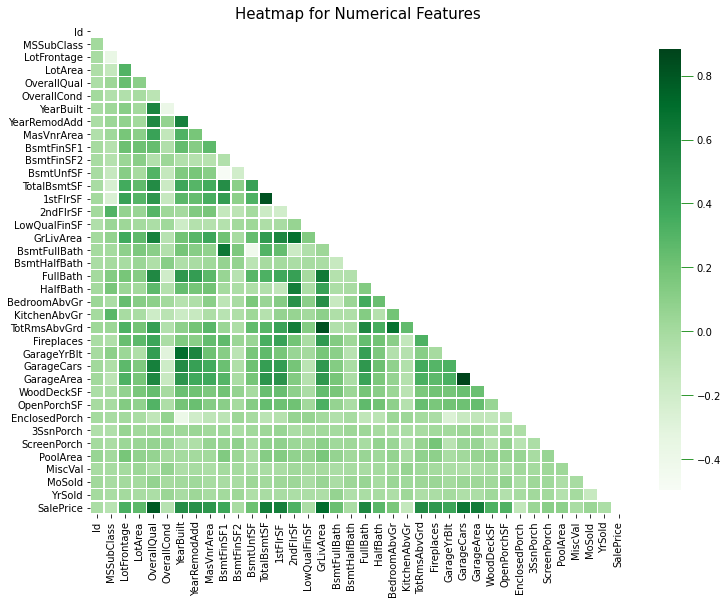

In [40]:
# Creating figure
fig, ax = plt.subplots(figsize=(12,9))

# Creating mask to show lower triangle only
mask = np.zeros_like(train.corr())
mask[np.triu_indices_from(mask)] = True

# Creating heatmap
ax = sns.heatmap(train.corr(), cmap="Greens", annot=False, mask=mask, lw=0.5, cbar_kws={'shrink':0.9})
ax.set_title('Heatmap for Numerical Features', fontsize=15)

# Customising color bar using matplotlib.colorbar.Colorbar object
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(axis='y', size=12, color='green', labelcolor='black', direction='out')

## Bar Chart for Numerical Features

In [41]:
# Creating dataframe for correlation with 'SalePrice'

num_corr = pd.DataFrame(train.corr()['SalePrice'].abs().sort_values(ascending=False))

In [42]:
# Creating Plotly Graph Objects Figure Constructor 
# https://plotly.com/python/creating-and-updating-figures/#graph-objects-figure-constructor

data = go.Bar(x = num_corr.index,
              y = num_corr.values.ravel(),
              marker={'color':'green'})

layout = go.Layout(title = 'Numerical Features and Correlation to SalePrice',
                   title_x = 0.5,
                   yaxis = {'title':'Correlation'},
                   height = 520,
                   width = 780)

fig = go.Figure(data=[data], layout=layout)

iplot(fig)

### Comments:
---

Evidently, there are many numerical features in the dataset, but only a few seem to be strongly correlated to `SalePrice`. 

Therefore, I have decided to shortlist features with a minimum correlation coefficient of 0.5.

## Numerical Feature Selection 

In [43]:
# Getting list of selected numerical features

# Setting mask for R > 0.5
mask = num_corr>0.5

selected_num = num_corr[mask.any(axis=1)].index

In [44]:
selected_num

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')

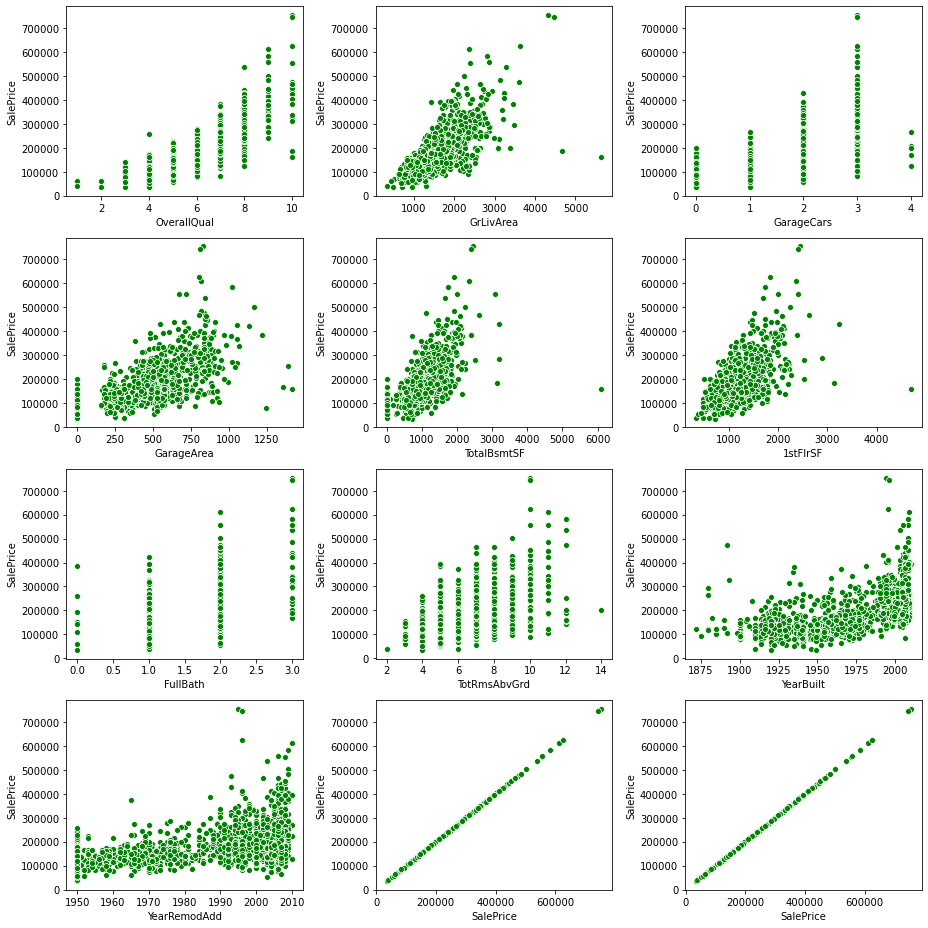

In [45]:
# Scatterplots of selected features against SalePrice

fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(13,13))

sns.scatterplot(x='OverallQual',  y='SalePrice', data=train, color='green', ax=ax[0,0])
sns.scatterplot(x='GrLivArea',    y='SalePrice', data=train, color='green', ax=ax[0,1])
sns.scatterplot(x='GarageCars',   y='SalePrice', data=train, color='green', ax=ax[0,2])
sns.scatterplot(x='GarageArea',   y='SalePrice', data=train, color='green', ax=ax[1,0])
sns.scatterplot(x='TotalBsmtSF',  y='SalePrice', data=train, color='green', ax=ax[1,1])
sns.scatterplot(x='1stFlrSF',     y='SalePrice', data=train, color='green', ax=ax[1,2])
sns.scatterplot(x='FullBath',     y='SalePrice', data=train, color='green', ax=ax[2,0])
sns.scatterplot(x='TotRmsAbvGrd', y='SalePrice', data=train, color='green', ax=ax[2,1])
sns.scatterplot(x='YearBuilt',    y='SalePrice', data=train, color='green', ax=ax[2,2])
sns.scatterplot(x='YearRemodAdd', y='SalePrice', data=train, color='green', ax=ax[3,0])
sns.scatterplot(x='SalePrice',    y='SalePrice', data=train, color='green', ax=ax[3,1])
sns.scatterplot(x='SalePrice',    y='SalePrice', data=train, color='green', ax=ax[3,2])

plt.tight_layout()

<a id='above'></a>


### Comments:
---

Some of these 'numerical' features turned out to be categorical features instead, just that they were ordinal.

I'll now investigate outliers for the numerical features first, followed by the categorical features in the [next section](#below).

For numerical features, outliers will be determiend via IQR.

For categorical features, outliers will be identified utilising the upper fences or lower fences, visualised via a **Boxplot**. Observations that are too far away willl be considered outliers.    

In [46]:
# Getting list of numerical features

num_feats = ['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'YearRemodAdd', 'SalePrice']

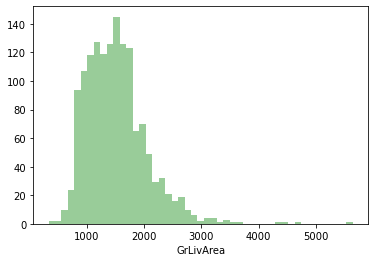

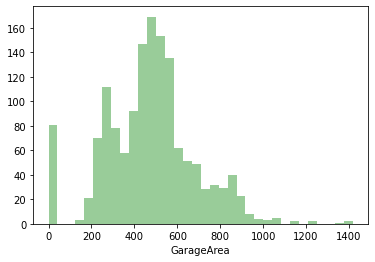

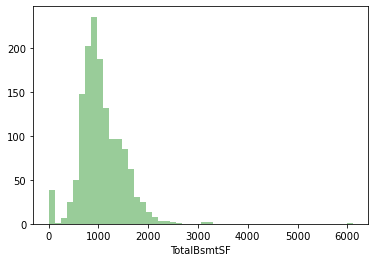

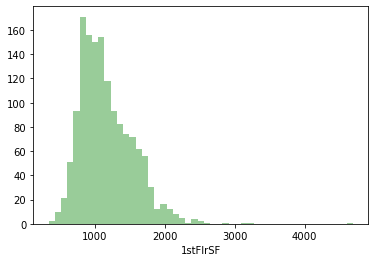

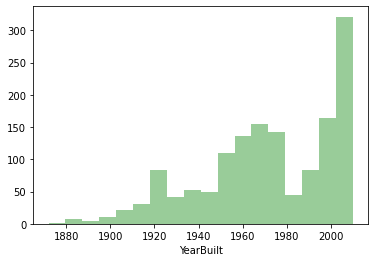

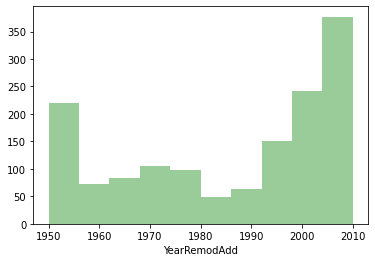

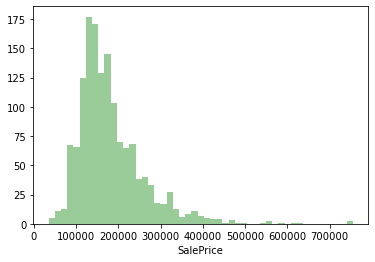

In [47]:
# Visualising distribution of numerical features before deciding how to treat for outliers

for feature in train[num_feats]:
    plt.show(sns.distplot(train[feature], kde=False, color='Green'))

### Comments:
---
It looks as though all numerical features are not normally distributed. This project is meant to employ Mutliple Regression as the choice of algorithm, prized for its interpretability. As such, I will not be attempting feature transformation. 

In order to standardise the outlier treatment process, I will not be using **z-scores** to detect outliers, because using them typically <a href='https://stats.stackexchange.com/questions/32357/can-i-use-a-z-score-with-skewed-and-non-normal-data'>requires a normally distributed</a> dataset.

Instead, I will utilise the **Interquartile Range (IQR)** to detect outliers, because it is an alternative method <a href='https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/#urvanov-syntax-highlighter-5f2bdb4451934883727613'>independent of the assumption of normality</a>.

**N.B:** For the purposes of this introductory project, *anomalies* will be treated the same as *outliers*.

## Outlier Treatment Using IQR

In [48]:
# Calculating 25th Percentile and 75th Percentile

q1 = train[num_feats].quantile(0.25)
q3 = train[num_feats].quantile(0.75)

In [49]:
# Interquartile Range Q3-Q1

iqr = q3 - q1
print(iqr)

GrLivArea         647.25
GarageArea        241.50
TotalBsmtSF       502.50
1stFlrSF          509.25
YearBuilt          46.00
YearRemodAdd       37.00
SalePrice       84025.00
dtype: float64


In [50]:
# Creating outlier mask

outlier_mask = ((train[num_feats] < (q1 - 1.5*iqr)) | (train[num_feats] > (q3 + 1.5*iqr)))
display(outlier_mask)

GrLivArea  GarageArea  TotalBsmtSF  1stFlrSF  YearBuilt  YearRemodAdd  \
0         False       False        False     False      False         False   
1         False       False        False     False      False         False   
2         False       False        False     False      False         False   
3         False       False        False     False      False         False   
4         False       False        False     False      False         False   
...         ...         ...          ...       ...        ...           ...   
1455      False       False        False     False      False         False   
1456      False       False        False     False      False         False   
1457      False       False        False     False      False         False   
1458      False       False        False     False      False         False   
1459      False       False        False     False      False         False   

      SalePrice  
0         False  
1         False  
2         False  
3         False  
4         False  
...         ...  
1455      False  
1456      False  
1457      False  
1458      False  
1459      False  

[1460 rows x 7 columns]

In [51]:
# Viewing train shape BEFORE outlier removal 

print(train.shape)

(1460, 81)


In [52]:
# Returning train Dataframe without outliers

train = train[~outlier_mask.any(axis=1)]

In [53]:
# Viewing train shape AFTER outlier removal

print(train.shape)

(1317, 81)


### Comments:
---

Outlier treatment for numerical features completed, 111 outliers removed via the IQR Method.

I'll now proceed investigate the Categorical Features

<a id='3.3'></a>


# 3.3 Categorical Features

## Boxplots

In [54]:
# Getting number of Categorical Features

len(cat_features)

43

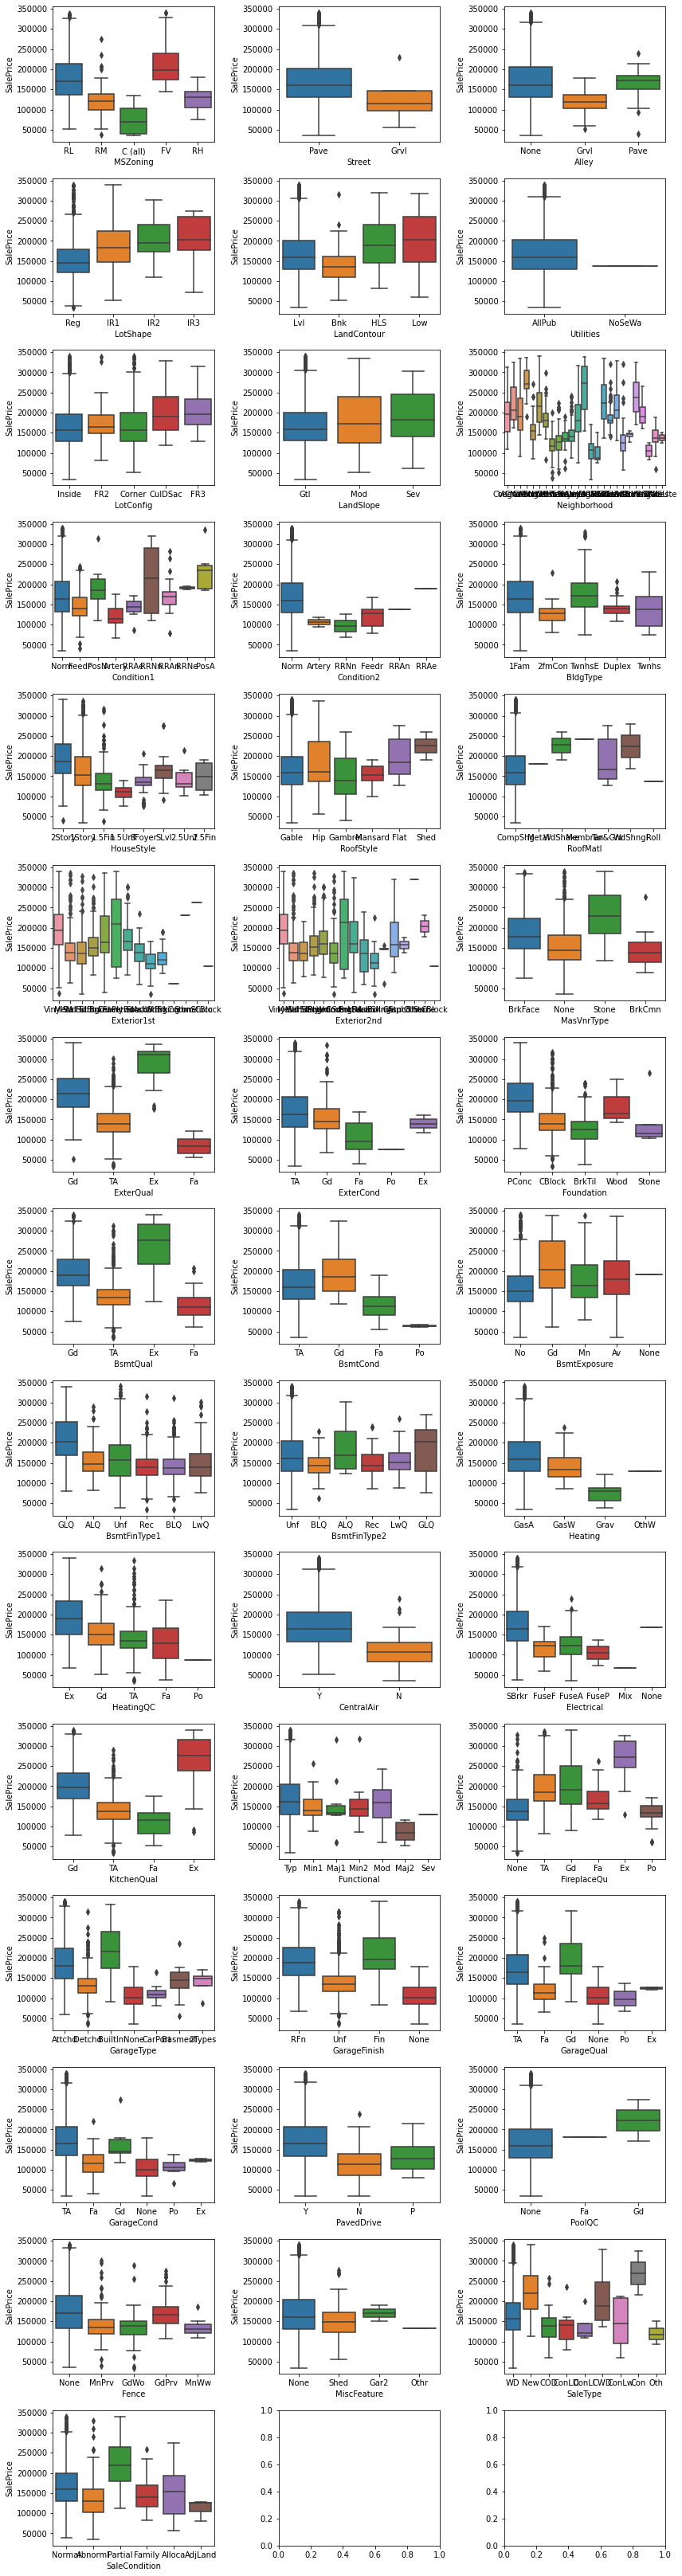

In [55]:
# Creating loop to generate 43 boxplots

# Minimum 45 plots for the 43 categories
rows = 15
cols = 3


fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(cols*4,rows*3))

for row in range(0, rows):
    for col in range(0, cols):  
        i = row*cols + col
        if i < len(cat_features):
            sns.boxplot(x=cat_features[i], y='SalePrice', data=train, ax = ax[row][col])
    
plt.tight_layout()    
plt.show()   

### Comments:
---

From the boxplots, it is possible to deduce which features have an approximate linear relationship with `SalePrice`. If the mean SalePrice for each category differs significantly, it is likely that they are related to SalePrice in some fashion. 

Whether or not they are linearly related to `SalePrice` is something I will investigate later. 

At this juncture, I will first shortlist features that are potentially related to `SalePrice`.

In [56]:
# Selecting categorical features that appear to be related to SalePrice

cat_feats = ['MSZoning',
             'Neighborhood',
             'Condition2',
             'MasVnrType',
             'ExterQual',
             'BsmtQual',
             'CentralAir',
             'KitchenQual',
             'SaleType',
             'SaleCondition']

cat_feats.sort()
print(cat_feats)

['BsmtQual', 'CentralAir', 'Condition2', 'ExterQual', 'KitchenQual', 'MSZoning', 'MasVnrType', 'Neighborhood', 'SaleCondition', 'SaleType']


<a id='below'></a>

### Comments:
---

These features are shortlisted, because they seem to have a significantly different mean `SalePrice` for each category.

Also, some features here are **Ordinal**, while some are **Nominal**. I will encode them after outlier treatment, at the [encoding](#encoding) section of this notebook.
* Ordinal Features will be encoded via Ordinal Encoding
* Nominal Features will be encoded via One-Hot Encoding

I will now proceed to check for outliers, **including** features [above](#above) that were supposedly numerical, but turned out to be categorical.


## Outlier Treatment Using Upper and Lower Fences

In [57]:
# # Loop to create multiple box plots, BUT I will investigate one at a time

# for cat_feature in cat_feats:
#     trace = []

#     for saleprice, feature in train[["SalePrice", cat_feature]].groupby(cat_feature):
#         trace.append(go.Box(y=feature["SalePrice"].values, name=saleprice))
    
#         layout = go.Layout(title=f"Boxplots of SalePrice and {cat_feature}",
#                            title_x=0.5,
#                            xaxis=dict(title=cat_feature),
#                            yaxis=dict(title='SalePrice'),
#                            autosize=False, width=780, height=520)

#     fig = go.Figure(data=trace, layout=layout)
#     iplot(fig)

In [58]:
# Creating Boxplot to Visualise Outliers for MSZoning

trace = []

for saleprice, mszoning in train[["SalePrice", "MSZoning"]].groupby("MSZoning"):
    trace.append(go.Box(y=mszoning["SalePrice"].values, name=saleprice))
    
layout = go.Layout(title="Boxplots of SalePrice and MSZoning",
                   title_x=0.5,
                   xaxis=dict(title='MSZoning'),
                   yaxis=dict(title='SalePrice'),
                   autosize=False, width=780, height=520)

fig = go.Figure(data=trace, layout=layout)
iplot(fig)

In [59]:
# Visually Identifying Outliers for MSZoning

outliers_mszoning_rl = train.loc[(train['MSZoning']=='RL') & (train['SalePrice']>400000)]
outliers_mszoning_rm = train.loc[(train['MSZoning']=='RM') & (train['SalePrice']>250000)]

outliers_mszoning = pd.concat([outliers_mszoning_rl, 
                               outliers_mszoning_rm])

In [60]:
# Checking Outliers for MSZoning

outliers_mszoning

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1405  1406         120       RM         44.0     3842   Pave  None      IR1   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
1405         HLS    AllPub  ...        0   None  None        None       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1405      1   2008        WD         Normal     275000  

[1 rows x 81 columns]

In [61]:
# Creating Boxplot to Visualise Outliers for Neighborhood

trace = []

for saleprice, neighborhood in train[["SalePrice", "Neighborhood"]].groupby("Neighborhood"):
    trace.append(go.Box(y=neighborhood["SalePrice"].values, name=saleprice))
    
layout = go.Layout(title="Boxplots of SalePrice and Street",
                   title_x=0.5,
                   xaxis=dict(title='Neighborhood'),
                   yaxis=dict(title='SalePrice'),
                   autosize=False, width=780, height=520)

fig = go.Figure(data=trace, layout=layout)
iplot(fig)

In [62]:
# Visually Identifying Outliers for Neighborhood

outliers_neighborhood_edwards = train.loc[(train['Neighborhood']=='Edwards') & (train['SalePrice']>400000)]
outliers_neighborhood_gilbert = train.loc[(train['Neighborhood']=='Gilbert') & (train['SalePrice']>250000)]
outliers_neighborhood_names = train.loc[(train['Neighborhood']=='NWAmes') & (train['SalePrice']>250000)]

outliers_neighborhood = pd.concat([outliers_neighborhood_edwards, 
                                   outliers_neighborhood_gilbert,
                                   outliers_neighborhood_names])

In [63]:
# Checking Outliers for Neighborhood

outliers_neighborhood

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
159    160          60       RL   134.000000    19378   Pave  None      IR1   
1107  1108          60       RL   168.000000    23257   Pave  None      IR3   
1127  1128          20       RL   182.000000    14572   Pave  None      IR3   
316    317          60       RL    94.000000    13005   Pave  None      IR1   
745    746          60       RL    70.049958     8963   Pave  None      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
159          HLS    AllPub  ...        0   None   None        None       0   
1107         HLS    AllPub  ...        0   None   None        None       0   
1127         Lvl    AllPub  ...        0   None   None        None       0   
316          Lvl    AllPub  ...        0   None  GdPrv        None       0   
745          Lvl    AllPub  ...        0   None   None        None       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
159       3   2006       New        Partial     320000  
1107      9   2006       New        Partial     274725  
1127     11   2007        WD         Family     259000  
316       8   2009        WD         Normal     260000  
745       7   2008        WD         Normal     299800  

[5 rows x 81 columns]

In [64]:
# Creating Boxplot to Visualise Outliers for Condition2

trace = []

for saleprice, condition2 in train[["SalePrice", "Condition2"]].groupby("Condition2"):
    trace.append(go.Box(y=condition2["SalePrice"].values, name=saleprice))
    
layout = go.Layout(title="Boxplots of SalePrice and Condition2",
                   title_x=0.5,
                   xaxis=dict(title='Condition2'),
                   yaxis=dict(title='SalePrice'),
                   autosize=False, width=780, height=520)

fig = go.Figure(data=trace, layout=layout)
iplot(fig)

In [65]:
# Visually Identifying Outliers for Condition2

outliers_condition2_normal = train.loc[(train['Condition2']=='Norm') & (train['SalePrice']>400000)]

outliers_condition2 = pd.concat([outliers_condition2_normal])

In [66]:
# Checking Outliers for Condition2

outliers_condition2

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

In [67]:
# Creating Boxplot to Visualise Outliers for MasVnrType

trace = []

for saleprice, masvnrtype in train[["SalePrice", "MasVnrType"]].groupby("MasVnrType"):
    trace.append(go.Box(y=masvnrtype["SalePrice"].values, name=saleprice))
    
layout = go.Layout(title="Boxplots of SalePrice and MasVnrType",
                   title_x=0.5,
                   xaxis=dict(title='MasVnrType'),
                   yaxis=dict(title='SalePrice'),
                   autosize=False, width=780, height=520)

fig = go.Figure(data=trace, layout=layout)
iplot(fig)

In [68]:
# Visually Identifying Outliers for MasVnrType

outliers_masvnrtype_brkface = train.loc[(train['MasVnrType']=='BrkFace') & (train['SalePrice']>425000)]
outliers_masvnrtype_none = train.loc[(train['MasVnrType']=='None') & (train['SalePrice']>350000)]

outliers_masvnrtype = pd.concat([outliers_masvnrtype_brkface, 
                                 outliers_masvnrtype_none])

In [69]:
# Checking Outliers for MSZoning

outliers_masvnrtype

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

In [70]:
# Creating Boxplot to Visualise Outliers for ExterQual

trace = []

for saleprice, exterqual in train[["SalePrice", "ExterQual"]].groupby("ExterQual"):
    trace.append(go.Box(y=exterqual["SalePrice"].values, name=saleprice))
    
layout = go.Layout(title="Boxplots of SalePrice and ExterQual",
                   title_x=0.5,
                   xaxis=dict(title='ExterQual'),
                   yaxis=dict(title='SalePrice'),
                   autosize=False, width=780, height=520)

fig = go.Figure(data=trace, layout=layout)
iplot(fig)

In [71]:
# Visually Identifying Outliers for ExterQual

outliers_exterqual = train.loc[(train['ExterQual']=='TA') & (train['SalePrice']>325000)]

In [72]:
# Checking Outliers for ExterQual

outliers_exterqual

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

In [73]:
# Creating Boxplot to Visualise Outliers for BsmtQual

trace = []

for saleprice, bsmtqual in train[["SalePrice", "BsmtQual"]].groupby("BsmtQual"):
    trace.append(go.Box(y=bsmtqual["SalePrice"].values, name=saleprice))
    
layout = go.Layout(title="Boxplots of SalePrice and BsmtQual",
                   title_x=0.5,
                   xaxis=dict(title='BsmtQual'),
                   yaxis=dict(title='SalePrice'),
                   autosize=False, width=780, height=520)

fig = go.Figure(data=trace, layout=layout)
iplot(fig)

In [74]:
# Visually Identifying Outliers for BsmtQual

outliers_bsmtqual = train.loc[(train['BsmtQual'] == 'TA') & (train['SalePrice'] > 300000)]

In [75]:
# Checking Outliers for BsmtQual

outliers_bsmtqual

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
218  219          50       RL    70.049958    15660   Pave  None      IR1   
322  323          60       RL    86.000000    10380   Pave  None      IR1   

    LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
218         Lvl    AllPub  ...        0   None   None        None       0   
322         Lvl    AllPub  ...        0   None  MnPrv        None       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
218      5   2008        WD         Normal     311500  
322      8   2007        WD         Normal     301000  

[2 rows x 81 columns]

In [76]:
# Creating Boxplot to Visualise Outliers for CentralAir

trace = []

for saleprice, centralair in train[["SalePrice", "CentralAir"]].groupby("CentralAir"):
    trace.append(go.Box(y=centralair["SalePrice"].values, name=saleprice))
    
layout = go.Layout(title="Boxplots of SalePrice and CentralAir",
                   title_x=0.5,
                   xaxis=dict(title='CentralAir'),
                   yaxis=dict(title='SalePrice'),
                   autosize=False, width=780, height=520)

fig = go.Figure(data=trace, layout=layout)
iplot(fig)

In [77]:
# Visually Identifying Outliers for CentralAir

outliers_centralair = train.loc[(train['CentralAir']=='Y') & (train['SalePrice']>450000)]

In [78]:
# Checking Outliers for CentralAir

outliers_centralair

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

In [79]:
# Creating Boxplot to Visualise Outliers for KitchenQual

trace = []

for saleprice, kitchenqual in train[["SalePrice", "KitchenQual"]].groupby("KitchenQual"):
    trace.append(go.Box(y=kitchenqual["SalePrice"].values, name=saleprice))
    
layout = go.Layout(title="Boxplots of SalePrice and KitchenQual",
                   title_x=0.5,
                   xaxis=dict(title='KitchenQual'),
                   yaxis=dict(title='SalePrice'),
                   autosize=False, width=780, height=520)

fig = go.Figure(data=trace, layout=layout)
iplot(fig)

In [80]:
# Visually Identifying Outliers for KitchenQual

outliers_kitchenqual_gd = train.loc[(train['KitchenQual']=='Gd') & (train['SalePrice']>400000)]
outliers_kitchenqual_ta = train.loc[(train['KitchenQual']=='TA') & (train['SalePrice']>275000)]

outliers_kitchenqual = pd.concat([outliers_kitchenqual_gd, 
                                  outliers_kitchenqual_ta])

In [81]:
# Checking Outliers for KitchenQual

outliers_kitchenqual

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
208  209          60       RL    70.049958    14364   Pave  None      IR1   
503  504          20       RL   100.000000    15602   Pave  None      IR1   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
208         Low    AllPub  ...        0   None  None        None       0   
503         Lvl    AllPub  ...        0   None  GdWo        None       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
208      4   2007        WD         Normal     277000  
503      3   2010        WD         Normal     289000  

[2 rows x 81 columns]

In [82]:
# Creating Boxplot to Visualise Outliers for SaleType

trace = []

for saleprice, saletype in train[["SalePrice", "SaleType"]].groupby("SaleType"):
    trace.append(go.Box(y=saletype["SalePrice"].values, name=saleprice))
    
layout = go.Layout(title="Boxplots of SalePrice and SaleType",
                   title_x=0.5,
                   xaxis=dict(title='SaleType'),
                   yaxis=dict(title='SalePrice'),
                   autosize=False, width=780, height=520)

fig = go.Figure(data=trace, layout=layout)
iplot(fig)

In [83]:
# Visually Identifying Outliers for SaleType

outliers_saletype = train.loc[(train['SaleType'] == 'WD') & (train['SalePrice']>350000)]

In [84]:
# Checking Outliers for SaleType

outliers_saletype

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

In [85]:
# Creating Boxplot to Visualise Outliers for SaleCondition

trace = []

for saleprice, salecondition in train[["SalePrice", "SaleCondition"]].groupby("SaleCondition"):
    trace.append(go.Box(y=salecondition["SalePrice"].values, name=saleprice))
    
layout = go.Layout(title="Boxplots of SalePrice and SaleCondition",
                   title_x=0.5,
                   xaxis=dict(title='SaleCondition'),
                   yaxis=dict(title='SalePrice'),
                   autosize=False, width=780, height=520)

fig = go.Figure(data=trace, layout=layout)
iplot(fig)

In [86]:
# Visually Identifying Outliers for SaleCondition

outliers_salecondition_abnorml = train.loc[(train['SaleCondition']=='Abnorml') & (train['SalePrice']>300000)]
outliers_salecondition_normal = train.loc[(train['SaleCondition']=='Normal') & (train['SalePrice']>350000)]

outliers_salecondition = pd.concat([outliers_salecondition_abnorml, 
                                    outliers_salecondition_normal])

In [87]:
# Checking Outliers for SaleCondition

outliers_salecondition

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
885    886         120       FV    50.000000     5119   Pave  None      IR1   
1032  1033          60       RL    70.049958    14541   Pave  None      IR1   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
885          Lvl    AllPub  ...        0   None  None        None       0   
1032         Lvl    AllPub  ...        0   None  None        None       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
885       1   2008       CWD        Abnorml     328900  
1032     11   2006        WD        Abnorml     310000  

[2 rows x 81 columns]

In [88]:
# Creating Boxplot to Visualise Outliers for OverallQual

trace = []

for saleprice, overallqual in train[["SalePrice", "OverallQual"]].groupby("OverallQual"):
    trace.append(go.Box(y=overallqual["SalePrice"].values, name=saleprice))
    
layout = go.Layout(title="Boxplots of SalePrice and OverallQual",
                   title_x=0.5,
                   xaxis=dict(title=f'OverallQual (r={num_corr.loc["OverallQual"][0]})'),
                   yaxis=dict(title='SalePrice'),
                   autosize=False, width=780, height=520)

fig = go.Figure(data=trace, layout=layout)
iplot(fig)

In [89]:
# Visually Identifying Outliers for Overall Qual

outliers_overallqual_4 = train.loc[(train['OverallQual']==4) & (train['SalePrice']>250000)]
outliers_overallqual_7 = train.loc[(train['OverallQual']==7) & (train['SalePrice']>350000)]


outliers_overallqual = pd.concat([outliers_overallqual_4, 
                                  outliers_overallqual_7])

In [90]:
# Checking outliers for OverallQual

outliers_overallqual

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
457  458          20       RL    70.049958    53227   Pave  None      IR1   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
457         Low    AllPub  ...        0   None  None        None       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
457      3   2008        WD         Normal     256000  

[1 rows x 81 columns]

In [91]:
# Creating Boxplot to Visualise Outliers for GarageCars

trace = []

for saleprice, garagecars in train[["SalePrice", "GarageCars"]].groupby("GarageCars"):
    trace.append(go.Box(y=garagecars["SalePrice"].values, name=saleprice))
    
layout = go.Layout(title="Boxplots of SalePrice and GarageCars",
                   title_x=0.5,
                   xaxis=dict(title=f'GarageCars (r={num_corr.loc["GarageCars"][0]})'),
                   yaxis=dict(title='SalePrice', side='left'),
                   autosize=False, width=750, height=500)

fig = go.Figure(data=trace, layout=layout)
iplot(fig)

In [92]:
# Visually Identifying Outliers for GarageCars

outliers_garagecars_1 = train.loc[(train['GarageCars']==1) & (train['SalePrice']>250000)]
outliers_garagecars_2 = train.loc[(train['GarageCars']==2) & (train['SalePrice']>350000)]

outliers_garagecars = pd.concat([outliers_garagecars_1, 
                                  outliers_garagecars_2])

In [93]:
# Checking outliers for GarageCars

outliers_garagecars

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
114    115          70       RL         61.0     7259   Pave  None      IR1   
1457  1458          70       RL         66.0     9042   Pave  None      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
114          Lvl    AllPub  ...        0   None  MnPrv        None       0   
1457         Lvl    AllPub  ...        0   None  GdPrv        Shed    2500   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
114       7   2007        WD         Normal     259500  
1457      5   2010        WD         Normal     266500  

[2 rows x 81 columns]

In [94]:
# Creating Boxplot to Visualise Outliers for FullBath

trace = []

for saleprice, fullbath in train[["SalePrice", "FullBath"]].groupby("FullBath"):
    trace.append(go.Box(y=fullbath["SalePrice"].values, name=saleprice))
    
layout = go.Layout(title="Boxplots of SalePrice and FullBath",
                   title_x=0.5,
                   xaxis=dict(title=f'FullBath (r={num_corr.loc["FullBath"][0]})'),
                   yaxis=dict(title='SalePrice', side='left'),
                   autosize=False, width=750, height=500)

fig = go.Figure(data=trace, layout=layout)
iplot(fig)

In [95]:
# Visually Identifying Outliers for FullBath

outliers_fullbath_0 = train.loc[(train['FullBath']==0) & (train['SalePrice']>350000)]
outliers_fullbath_1 = train.loc[(train['FullBath']==1) & (train['SalePrice']>300000)]
outliers_fullbath_2 = train.loc[(train['FullBath']==2) & (train['SalePrice']>400000)]

outliers_fullbath = pd.concat([outliers_fullbath_0,
                               outliers_fullbath_1,
                               outliers_fullbath_2])

In [96]:
# Checking outliers for FullBath

outliers_fullbath

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
167  168          60       RL    86.000000    10562   Pave  None      Reg   
218  219          50       RL    70.049958    15660   Pave  None      IR1   
326  327         120       RL    32.000000    10846   Pave  None      IR1   
568  569          50       RL    79.000000    12327   Pave  None      IR1   

    LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
167         Lvl    AllPub  ...        0   None  None        None       0   
218         Lvl    AllPub  ...        0   None  None        None       0   
326         Lvl    AllPub  ...        0   None  None        None       0   
568         Low    AllPub  ...        0   None  None        None       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
167     11   2007       New        Partial     325624  
218      5   2008        WD         Normal     311500  
326      5   2008       Con         Normal     324000  
568      9   2009        WD         Normal     316600  

[4 rows x 81 columns]

In [97]:
# Creating Boxplot to Visualise Outliers for TotRmsAbvGrd

trace = []

for saleprice, totrmsabvgrd in train[["SalePrice", "TotRmsAbvGrd"]].groupby("TotRmsAbvGrd"):
    trace.append(go.Box(y=totrmsabvgrd["SalePrice"].values, name=saleprice ) )
    
layout = go.Layout(title="Boxplots of SalePrice and TotRmsAbvGrd",
                   title_x=0.5,
                   xaxis=dict(title=f'TotRmsAbvGrd (r={num_corr.loc["TotRmsAbvGrd"][0]})'),
                   yaxis=dict(title='SalePrice', side='left'),
                   autosize=False, width=750, height=500)

fig = go.Figure(data=trace, layout=layout)
iplot(fig)

In [98]:
# Visually Identifying Outliers for TotRmsAbvGrd

outliers_totrmsabvgrd_5 = train.loc[(train['TotRmsAbvGrd']==5) & (train['SalePrice']>350000)]
outliers_totrmsabvgrd_6 = train.loc[(train['TotRmsAbvGrd']==6) & (train['SalePrice']>350000)]
outliers_totrmsabvgrd_7 = train.loc[(train['TotRmsAbvGrd']==7) & (train['SalePrice']>400000)]
outliers_totrmsabvgrd_8 = train.loc[(train['TotRmsAbvGrd']==8) & (train['SalePrice']>400000)]

outliers_totrmsabvgrd = pd.concat([outliers_totrmsabvgrd_5, 
                                   outliers_totrmsabvgrd_6,
                                   outliers_totrmsabvgrd_7,
                                   outliers_totrmsabvgrd_8])

In [99]:
# Checking outliers for TotRmsAbvGrd

outliers_totrmsabvgrd

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

[0 rows x 81 columns]

In [100]:
# Compiling all outliers for shortlisted categorical features

outliers_cat = pd.concat([outliers_mszoning,
                          outliers_neighborhood,
                          outliers_condition2,
                          outliers_masvnrtype,
                          outliers_exterqual,
                          outliers_bsmtqual,
                          outliers_centralair,
                          outliers_kitchenqual,
                          outliers_saletype,
                          outliers_salecondition,
                          outliers_overallqual,
                          outliers_garagecars,
                          outliers_totrmsabvgrd,
                          outliers_fullbath])

display(outliers_cat)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1405  1406         120       RM    44.000000     3842   Pave  None      IR1   
159    160          60       RL   134.000000    19378   Pave  None      IR1   
1107  1108          60       RL   168.000000    23257   Pave  None      IR3   
1127  1128          20       RL   182.000000    14572   Pave  None      IR3   
316    317          60       RL    94.000000    13005   Pave  None      IR1   
745    746          60       RL    70.049958     8963   Pave  None      IR1   
218    219          50       RL    70.049958    15660   Pave  None      IR1   
322    323          60       RL    86.000000    10380   Pave  None      IR1   
208    209          60       RL    70.049958    14364   Pave  None      IR1   
503    504          20       RL   100.000000    15602   Pave  None      IR1   
885    886         120       FV    50.000000     5119   Pave  None      IR1   
1032  1033          60       RL    70.049958    14541   Pave  None      IR1   
457    458          20       RL    70.049958    53227   Pave  None      IR1   
114    115          70       RL    61.000000     7259   Pave  None      IR1   
1457  1458          70       RL    66.000000     9042   Pave  None      Reg   
167    168          60       RL    86.000000    10562   Pave  None      Reg   
218    219          50       RL    70.049958    15660   Pave  None      IR1   
326    327         120       RL    32.000000    10846   Pave  None      IR1   
568    569          50       RL    79.000000    12327   Pave  None      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1405         HLS    AllPub  ...        0   None   None        None       0   
159          HLS    AllPub  ...        0   None   None        None       0   
1107         HLS    AllPub  ...        0   None   None        None       0   
1127         Lvl    AllPub  ...        0   None   None        None       0   
316          Lvl    AllPub  ...        0   None  GdPrv        None       0   
745          Lvl    AllPub  ...        0   None   None        None       0   
218          Lvl    AllPub  ...        0   None   None        None       0   
322          Lvl    AllPub  ...        0   None  MnPrv        None       0   
208          Low    AllPub  ...        0   None   None        None       0   
503          Lvl    AllPub  ...        0   None   GdWo        None       0   
885          Lvl    AllPub  ...        0   None   None        None       0   
1032         Lvl    AllPub  ...        0   None   None        None       0   
457          Low    AllPub  ...        0   None   None        None       0   
114          Lvl    AllPub  ...        0   None  MnPrv        None       0   
1457         Lvl    AllPub  ...        0   None  GdPrv        Shed    2500   
167          Lvl    AllPub  ...        0   None   None        None       0   
218          Lvl    AllPub  ...        0   None   None        None       0   
326          Lvl    AllPub  ...        0   None   None        None       0   
568          Low    AllPub  ...        0   None   None        None       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1405      1   2008        WD         Normal     275000  
159       3   2006       New        Partial     320000  
1107      9   2006       New        Partial     274725  
1127     11   2007        WD         Family     259000  
316       8   2009        WD         Normal     260000  
745       7   2008        WD         Normal     299800  
218       5   2008        WD         Normal     311500  
322       8   2007        WD         Normal     301000  
208       4   2007        WD         Normal     277000  
503       3   2010        WD         Normal     289000  
885       1   2008       CWD        Abnorml     328900  
1032     11   2006        WD        Abnorml     310000  
457       3   2008        WD         Normal     256000  
114       7   2007        WD         Normal     259500  
1457      5

In [101]:
# Checking shape BEFORE drop

train.shape

(1317, 81)

In [102]:
# Removing outliers from train 

train = train.drop(outliers_cat.index)

In [103]:
# Checking shape AFTER drop

print(train.shape)

(1299, 81)


### Comments:
---
Outlier treatment completed, a total of 39 outliers for categorical features have been removed.

I will now proceed to check for multicollinearity.

## Treating Multicollinearity

In [104]:
# List of Numerical Features

print(num_feats)

['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'YearRemodAdd', 'SalePrice']


In [105]:
# List of categorical features

cat_feats = cat_feats + ['OverallQual', 'GarageCars', 'TotRmsAbvGrd', 'FullBath']
print(cat_feats)

['BsmtQual', 'CentralAir', 'Condition2', 'ExterQual', 'KitchenQual', 'MSZoning', 'MasVnrType', 'Neighborhood', 'SaleCondition', 'SaleType', 'OverallQual', 'GarageCars', 'TotRmsAbvGrd', 'FullBath']


In [106]:
# List of Selected Features

selected_feats = num_feats + cat_feats
print(selected_feats)

['GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt', 'YearRemodAdd', 'SalePrice', 'BsmtQual', 'CentralAir', 'Condition2', 'ExterQual', 'KitchenQual', 'MSZoning', 'MasVnrType', 'Neighborhood', 'SaleCondition', 'SaleType', 'OverallQual', 'GarageCars', 'TotRmsAbvGrd', 'FullBath']


## Heatmap to Check for Multicollinearity

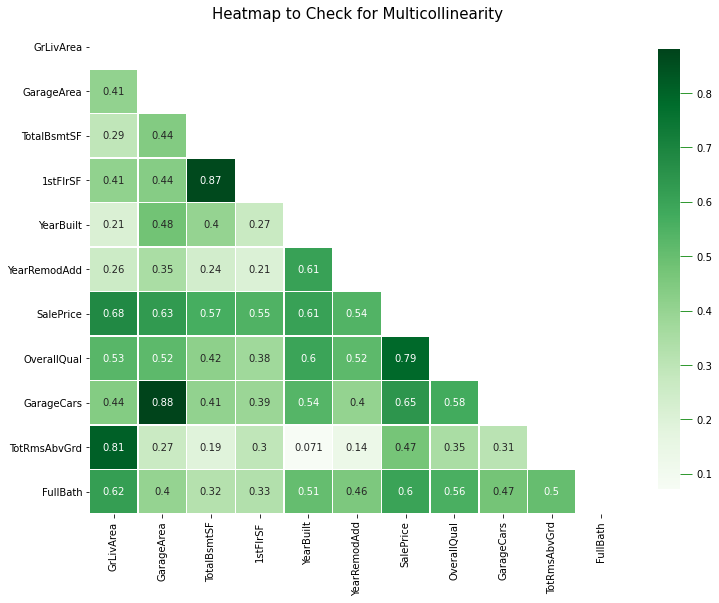

In [107]:
# Creating figure
fig, ax = plt.subplots(figsize=(12,9))

# Creating mask to show lower triangle only
mask = np.zeros_like(train[selected_feats].corr())
mask[np.triu_indices_from(mask)] = True

# Creating heatmap
ax = sns.heatmap((train[selected_feats].corr()), cmap="Greens", annot=True, mask=mask, lw=0.5, cbar_kws={'shrink':0.9})
ax.set_title('Heatmap to Check for Multicollinearity', fontsize=15)

# Customising color bar using matplotlib.colorbar.Colorbar object
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(axis='y', size=12, color='green', labelcolor='black', direction='out')

### Comments:

Clearly, there is evidence of multicollinearity among some features, such as between `TotRmsAbvGrd` and `GrLivArea`, and between `TotRmsAbvGrd` and `GrLivArea`. I will proceed to exclude features which cause multicollinearity. 

In [108]:
# Features that cause multicollinearity

multicol_feats = ['GarageCars', 'TotRmsAbvGrd', '1stFlrSF']

In [109]:
# Dropping features from train set and test set

train.drop(columns=multicol_feats, inplace=True)
test.drop(columns=multicol_feats, inplace=True)

In [110]:
# Updated List of Selected Numerical Features

num_feats = [x for x in num_feats if x not in multicol_feats]
print(num_feats)

['GrLivArea', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd', 'SalePrice']


In [111]:
# Updated List of Selected Categorical Features

cat_feats = [x for x in cat_feats if x not in multicol_feats]
print(cat_feats)

['BsmtQual', 'CentralAir', 'Condition2', 'ExterQual', 'KitchenQual', 'MSZoning', 'MasVnrType', 'Neighborhood', 'SaleCondition', 'SaleType', 'OverallQual', 'FullBath']


In [112]:
# Updated List of Selected Features

selected_feats = num_feats + cat_feats
print(selected_feats)

['GrLivArea', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd', 'SalePrice', 'BsmtQual', 'CentralAir', 'Condition2', 'ExterQual', 'KitchenQual', 'MSZoning', 'MasVnrType', 'Neighborhood', 'SaleCondition', 'SaleType', 'OverallQual', 'FullBath']


### Comments:
---

Multicollinear features have been dropped, I will now begin categorical feature encoding.

<a id='4'></a>

# 4. Preprocessing

In [113]:
# List of Ordinal Categorical Features

cat_feats_ord = ['OverallQual', 
                 'FullBath', 
                 'ExterQual', 
                 'BsmtQual', 
                 'KitchenQual'] 

print(cat_feats_ord)

['OverallQual', 'FullBath', 'ExterQual', 'BsmtQual', 'KitchenQual']


In [114]:
# List of Nominal Categorical Features

cat_feats_nom = [x for x in cat_feats if x not in cat_feats_ord]

print(cat_feats_nom)

['CentralAir', 'Condition2', 'MSZoning', 'MasVnrType', 'Neighborhood', 'SaleCondition', 'SaleType']


<a id='encoding'></a>

### Comments:

As mentioned [above](#below):
* Ordinal features will be encoded using Ordinal Encoding
* Nominal features will be encoded using One-Hot Encoding

## Ordinal Feature Encoding

In [115]:
# Checking unique categories in Ordinal Features for train and test set BEFORE Encoding

for ord_feat in ['ExterQual', 'BsmtQual', 'KitchenQual']:
    print(f'Training Data: {train[ord_feat].unique()} are the unique values in {ord_feat}')
    print(f'Test Data: {test[ord_feat].unique()} are the unique values in {ord_feat}')

Training Data: ['Gd' 'TA' 'Ex' 'Fa'] are the unique values in ExterQual
Test Data: ['TA' 'Gd' 'Ex' 'Fa'] are the unique values in ExterQual
Training Data: ['Gd' 'TA' 'Ex' 'Fa'] are the unique values in BsmtQual
Test Data: ['TA' 'Gd' 'Ex' 'Fa' 'None'] are the unique values in BsmtQual
Training Data: ['Gd' 'TA' 'Fa' 'Ex'] are the unique values in KitchenQual
Test Data: ['TA' 'Gd' 'Ex' 'Fa' 'None'] are the unique values in KitchenQual


In [116]:
# Creating Map for Ordinal Features

map_ord = {'Ex': 4,
           'Gd': 3,
           'TA': 2,
           'Fa': 1,
           'None': 0}

In [117]:
# Applying map to ordinal features

for ord_feat in ['ExterQual', 'BsmtQual', 'KitchenQual']:
    train[ord_feat] = train[ord_feat].map(map_ord)
    test[ord_feat] = test[ord_feat].map(map_ord)

In [118]:
# Checking unique categories in Ordinal Features for train and test set AFTER Encoding

for ord_feat in ['ExterQual', 'BsmtQual', 'KitchenQual']:
    print(f'{train[ord_feat].unique()} are the unique values in {ord_feat}')
    print(f'{test[ord_feat].unique()} are the unique values in {ord_feat}')

[3 2 4 1] are the unique values in ExterQual
[2 3 4 1] are the unique values in ExterQual
[3 2 4 1] are the unique values in BsmtQual
[2 3 4 1 0] are the unique values in BsmtQual
[3 2 1 4] are the unique values in KitchenQual
[2 3 4 1 0] are the unique values in KitchenQual


In [119]:
# Storing encoded selected features in temp dataframe

test_ord_encoded = test[[x for x in selected_feats if x not in 'SalePrice']]
train_ord_encoded = train[selected_feats]

### Comments:
---

Ordinal encoding successful, I will now move on to One-Hot Encoding for nominal features.

## Nominal Feature Encoding

In [120]:
# Checking unique categories in Nominal Features BEFORE Encoding

for nom_feat in cat_feats_nom:
    print(f'Training Data: {train_ord_encoded[nom_feat].unique()} are the unique values in {nom_feat}')
    print(f'Test Data:{test_ord_encoded[nom_feat].unique()} are the unique values in {nom_feat}')
    print('------------------------------------------------------------------------------------------------------')

Training Data: ['Y' 'N'] are the unique values in CentralAir
Test Data:['Y' 'N'] are the unique values in CentralAir
------------------------------------------------------------------------------------------------------
Training Data: ['Norm' 'Artery' 'RRNn' 'Feedr' 'RRAn' 'RRAe'] are the unique values in Condition2
Test Data:['Norm' 'Feedr' 'PosA' 'PosN' 'Artery'] are the unique values in Condition2
------------------------------------------------------------------------------------------------------
Training Data: ['RL' 'RM' 'C (all)' 'FV' 'RH'] are the unique values in MSZoning
Test Data:['RH' 'RL' 'RM' 'FV' 'C (all)' 'None'] are the unique values in MSZoning
------------------------------------------------------------------------------------------------------
Training Data: ['BrkFace' 'None' 'Stone' 'BrkCmn'] are the unique values in MasVnrType
Test Data:['None' 'BrkFace' 'Stone' 'BrkCmn'] are the unique values in MasVnrType
---------------------------------------------------------

In [121]:
# Combining train_ord_encoded and test_ord_encodee and using Pandas' get_dummies as One-Hot Encoder

combined_encoded = pd.get_dummies(pd.concat([train_ord_encoded, test_ord_encoded], keys=['Train', 'Test']), columns=cat_feats_nom, drop_first=True)

In [122]:
# Viewing combined_encoded

display(combined_encoded)

GrLivArea  GarageArea  TotalBsmtSF  YearBuilt  YearRemodAdd  \
Train 0          1710       548.0        856.0       2003          2003   
      1          1262       460.0       1262.0       1976          1976   
      2          1786       608.0        920.0       2001          2002   
      3          1717       642.0        756.0       1915          1970   
      4          2198       836.0       1145.0       2000          2000   
...               ...         ...          ...        ...           ...   
Test  1454       1092         0.0        546.0       1970          1970   
      1455       1092       286.0        546.0       1970          1970   
      1456       1224       576.0       1224.0       1960          1996   
      1457        970         0.0        912.0       1992          1992   
      1458       2000       650.0        996.0       1993          1994   

            SalePrice  BsmtQual  ExterQual  KitchenQual  OverallQual  ...  \
Train 0      208500.0         3          3            3            7  ...   
      1      181500.0         3          2            2            6  ...   
      2      223500.0         3          3            3            7  ...   
      3      140000.0         2          2            3            7  ...   
      4      250000.0         3          3            3            8  ...   
...               ...       ...        ...          ...          ...  ...   
Test  1454        NaN         2          2            2            4  ...   
      1455        NaN         2          2            2            4  ...   
      1456        NaN         2          2            2            5  ...   
      1457        NaN         3          2            2            5  ...   
      1458        NaN         3          2            2            7  ...   

            SaleCondition_Partial  SaleType_CWD  SaleType_Con  SaleType_ConLD  \
Train 0                         0             0             0               0   
      1                         0             0             0               0   
      2                         0             0             0               0   
      3                         0             0             0               0   
      4                         0             0             0               0   
...                           ...           ...           ...             ...   
Test  1454                      0             0             0               0   
      1455                      0             0             0               0   
      1456                      0             0             0               0   
      1457                      0             0             0               0   
      1458                      0             0             0               0   

            SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_None  \
Train 0                  0               0             0              0   
      1                  0               0             0              0   
      2                  0               0             0              0   
      3                  0               0             0              0   
      4                  0               0             0              0   
...                    ...             ...           ...            ...   
Test  1454               0               0             0              0   
      1455               0               0             0              0   
      1456               0               0             0              0   
      1457               0               0             0              0   
      1458               0               0             0              0   

            SaleType_Oth  SaleType_WD  
Train 0                0            1  
      1                0            1  
      2                0            1  
      3                0            1  
      4                0            1  
...                  ...          ...  
Test  1454             0        

In [123]:
# Splitting combined_encoded to get back encoded train and test set using Cross Section
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.xs.html

train_encoded, test_encoded = combined_encoded.xs('Train'), combined_encoded.xs('Test')

In [124]:
# Checking train_encoded

display(train_encoded)

GrLivArea  GarageArea  TotalBsmtSF  YearBuilt  YearRemodAdd  SalePrice  \
0          1710       548.0        856.0       2003          2003   208500.0   
1          1262       460.0       1262.0       1976          1976   181500.0   
2          1786       608.0        920.0       2001          2002   223500.0   
3          1717       642.0        756.0       1915          1970   140000.0   
4          2198       836.0       1145.0       2000          2000   250000.0   
...         ...         ...          ...        ...           ...        ...   
1454       1221       400.0       1221.0       2004          2005   185000.0   
1455       1647       460.0        953.0       1999          2000   175000.0   
1456       2073       500.0       1542.0       1978          1988   210000.0   
1458       1078       240.0       1078.0       1950          1996   142125.0   
1459       1256       276.0       1256.0       1965          1965   147500.0   

      BsmtQual  ExterQual  KitchenQual  OverallQual  ...  \
0            3          3            3            7  ...   
1            3          2            2            6  ...   
2            3          3            3            7  ...   
3            2          2            3            7  ...   
4            3          3            3            8  ...   
...        ...        ...          ...          ...  ...   
1454         3          3            3            7  ...   
1455         3          2            2            6  ...   
1456         3          2            2            6  ...   
1458         2          2            3            5  ...   
1459         2          3            2            5  ...   

      SaleCondition_Partial  SaleType_CWD  SaleType_Con  SaleType_ConLD  \
0                         0             0             0               0   
1                         0             0             0               0   
2                         0             0             0               0   
3                         0             0             0               0   
4                         0             0             0               0   
...                     ...           ...           ...             ...   
1454                      0             0             0               0   
1455                      0             0             0               0   
1456                      0             0             0               0   
1458                      0             0             0               0   
1459                      0             0             0               0   

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_None  \
0                  0               0             0              0   
1                  0               0             0              0   
2                  0               0             0              0   
3                  0               0             0              0   
4                  0               0             0              0   
...              ...             ...           ...            ...   
1454               0               0             0              0   
1455               0               0             0              0   
1456               0               0             0              0   
1458               0               0             0              0   
1459               0               0             0              0   

      SaleType_Oth  SaleType_WD  
0                0            1  
1                0            1  
2                0            1  
3                0            1  
4                0            1  
...            ...          ...  
1454             0            1  
1455             0            1  
1456             0            1  
1458             0            1  
1459             0            1  

[1299 rows x 65 columns]

In [125]:
# Checking test_encoded, dropping 'SalePrice'
# When I combined them, SalePrice column was filled with NaNs for test, since test doesnt come with 'SalePrice'

test_encoded.drop(columns=['SalePrice'], inplace=True)

C:\Users\Shaun\anaconda3\lib\site-packages\pandas\core\frame.py:4164: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [126]:
display(test_encoded)

GrLivArea  GarageArea  TotalBsmtSF  YearBuilt  YearRemodAdd  BsmtQual  \
0           896       730.0        882.0       1961          1961         2   
1          1329       312.0       1329.0       1958          1958         2   
2          1629       482.0        928.0       1997          1998         3   
3          1604       470.0        926.0       1998          1998         2   
4          1280       506.0       1280.0       1992          1992         3   
...         ...         ...          ...        ...           ...       ...   
1454       1092         0.0        546.0       1970          1970         2   
1455       1092       286.0        546.0       1970          1970         2   
1456       1224       576.0       1224.0       1960          1996         2   
1457        970         0.0        912.0       1992          1992         3   
1458       2000       650.0        996.0       1993          1994         3   

      ExterQual  KitchenQual  OverallQual  FullBath  ...  \
0             2            2            5         1  ...   
1             2            3            6         1  ...   
2             2            2            5         2  ...   
3             2            3            6         2  ...   
4             3            3            8         2  ...   
...         ...          ...          ...       ...  ...   
1454          2            2            4         1  ...   
1455          2            2            4         1  ...   
1456          2            2            5         1  ...   
1457          2            2            5         1  ...   
1458          2            2            7         2  ...   

      SaleCondition_Partial  SaleType_CWD  SaleType_Con  SaleType_ConLD  \
0                         0             0             0               0   
1                         0             0             0               0   
2                         0             0             0               0   
3                         0             0             0               0   
4                         0             0             0               0   
...                     ...           ...           ...             ...   
1454                      0             0             0               0   
1455                      0             0             0               0   
1456                      0             0             0               0   
1457                      0             0             0               0   
1458                      0             0             0               0   

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_None  \
0                  0               0             0              0   
1                  0               0             0              0   
2                  0               0             0              0   
3                  0               0             0              0   
4                  0               0             0              0   
...              ...             ...           ...            ...   
1454               0               0             0              0   
1455               0               0             0              0   
1456               0               0             0              0   
1457               0               0             0              0   
1458               0               0             0              0   

      SaleType_Oth  SaleType_WD  
0                0            1  
1                0            1  
2                0            1  
3                0            1  
4                0            1  
...            ...          ...  
1454             0            1  
1455             0            1  
1456             0            1  
1457             0            1  
1458             0            1  

[1459 rows x 64 columns]

### Comments:
---

One-Hot Encoding successful, I will now proceed to prepare the data for modelling.

In [127]:
# Saving finalised datasets to csv

# train_encoded.to_csv('./datasets/train_encoded.csv', index=False)
# test_encoded.to_csv('./datasets/test_encoded.csv', index=False)

## Setting Features and Target

In [128]:
# Getting List of Features

features = [x for x in train_encoded.columns if x not in 'SalePrice']
print(features)

['GrLivArea', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd', 'BsmtQual', 'ExterQual', 'KitchenQual', 'OverallQual', 'FullBath', 'CentralAir_Y', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'MSZoning_FV', 'MSZoning_None', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'SaleC

In [129]:
# Getting Target

target = ['SalePrice']
print(target)

['SalePrice']


## Train-Test-Split

In [130]:
X = train_encoded[features]
y = train_encoded[target]

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=708)

## Scaling

In [132]:
ss = StandardScaler()

In [133]:
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.fit_transform(X_test)

### Comments:
---

The data is ready for modelling. The following models will be employed:
* Linear Regression
* Ridge Regression
* Lasso Regression

The models will be evaluated via $R^2$ Score. The best model will be chosen to predict on the test set, for Kaggle Submission.

<a id='5'></a>

# 5. Modelling

## OLS Linear Regression

In [134]:
# Instantiating Linear Regression
lr = LinearRegression()

# Instantiating KFold
kf_lr = KFold(n_splits = 5,
              shuffle = True,
              random_state = 708)

# Fitting Linear Regression Model
lr.fit(X_train_sc, y_train)

LinearRegression()

In [135]:
# Getting Cross Validated Scores for train set and test set using Linear Regression

lr_score_train = cross_val_score(lr, X_train_sc, y_train, cv=kf_lr).mean()
lr_score_test = cross_val_score(lr, X_test_sc, y_test, cv=kf_lr).mean()

print(f'R\u00b2 Score for Train Set: {lr_score_train}')
print(f'R\u00b2 Score for Test Set: {lr_score_test}')

R² Score for Train Set: -6.432733642489459e+24
R² Score for Test Set: -1.8425099941886567e+22


In [136]:
# Getting RMSE for Train set and Test set using Linear Regression

lr_rmse_train = mean_squared_error(y_true=y_train, y_pred=lr.predict(X_train_sc), squared=False)
lr_rmse_test = mean_squared_error(y_true=y_test, y_pred=lr.predict(X_test_sc), squared=False)

print(f'RMSE for Train Set: {lr_rmse_train}')
print(f'RMSE for Test Set: {lr_rmse_test}')

RMSE for Train Set: 19929.48538648971
RMSE for Test Set: 23597.4007214838


In [137]:
# Saving metrics into a dataframe

lr_metrics = pd.DataFrame(data=[lr_score_train,
                                lr_score_test,
                                lr_rmse_train,
                                lr_rmse_test],

                          index=["R\u00b2 Score (Train)", 
                                 "R\u00b2 Score (Test)",
                                 "RMSE (Train)",
                                 "RMSE (Test)"],

                          columns=['Linear Regression'])

## Ridge Regression

In [138]:
# Instatiating KFold for RidgeCV

kf_ridge = KFold(n_splits = 5,
                 shuffle = True,
                 random_state = 708)

In [139]:
# Instantiating RidgeCV 

ridge = RidgeCV(cv=kf_ridge)

In [140]:
# Fitting RidgeCV

print(ridge.fit(X_train_sc, y_train))

RidgeCV(alphas=array([ 0.1,  1. , 10. ]),
        cv=KFold(n_splits=5, random_state=708, shuffle=True))


In [141]:
# Getting optimal alpha from RidgeCV

optimal_alpha_ridge = ridge.alpha_

print(f'Optimal alpha for Ridge Regression is {optimal_alpha_ridge}')

Optimal alpha for Ridge Regression is 10.0


In [142]:
# Instantiating Ridge with optimal alpha

optimised_ridge = Ridge(alpha=optimal_alpha_ridge)

In [143]:
# Fitting Optimised Ridge

optimised_ridge.fit(X_train_sc, y_train)

Ridge(alpha=10.0)

In [144]:
# Getting Cross Validated Scores for train set and test set using Optimised Ridge

ridge_score_train = cross_val_score(optimised_ridge, X_train_sc, y_train, cv=kf_ridge).mean()
ridge_score_test = cross_val_score(optimised_ridge, X_test_sc, y_test, cv=kf_ridge).mean()

print(f'R\u00b2 Score for Train Set: {ridge_score_train}')
print(f'R\u00b2 Score for Test Set: {ridge_score_test}')

R² Score for Train Set: 0.8610423826548649
R² Score for Test Set: 0.7417624920544897


In [145]:
# Getting RMSE for Train set and Test set using Optimsied Ridge

ridge_rmse_train = mean_squared_error(y_true=y_train, y_pred=optimised_ridge.predict(X_train_sc), squared=False)
ridge_rmse_test = mean_squared_error(y_true=y_test, y_pred=optimised_ridge.predict(X_test_sc), squared=False)

print(f'RMSE for Train Set: {ridge_rmse_train}')
print(f'RMSE for Test Set: {ridge_rmse_test}')

RMSE for Train Set: 19507.45283177303
RMSE for Test Set: 22944.236551773854


In [146]:
# Saving metrics into a dataframe

ridge_metrics = pd.DataFrame(data=[ridge_score_train,
                                   ridge_score_test,
                                   ridge_rmse_train,
                                   ridge_rmse_test],
                            
                            index=['R\u00b2 Score (Train)',
                                   'R\u00b2 Score (Test)',
                                   'RMSE (Train)',
                                   'RMSE (Test)'],
                             
                            columns=['Ridge Regression'])

## Lasso Regression

In [147]:
# Instantiaing KFolds for LassoCV

kf_lasso = KFold(n_splits = 5,
                  shuffle=True,
                  random_state=708)

In [148]:
# Instantiating LassoCV

lasso = LassoCV(cv=kf_lasso)

In [149]:
# Fitting LassoCV

lasso.fit(X_train_sc, y_train)

C:\Users\Shaun\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



LassoCV(cv=KFold(n_splits=5, random_state=708, shuffle=True))

In [150]:
# Getting Optimal Alpha from LassoCV

optimal_alpha_lasso = lasso.alpha_

print(f'Optimal alpha for Lasso Regression is {optimal_alpha_lasso}')

Optimal alpha for Lasso Regression is 392.47055646935945


In [151]:
# Instantiating Lasso with optimal alpha 

optimised_lasso = Lasso(alpha=optimal_alpha_lasso)

In [152]:
# Fitting Optimised Lasso

optimised_lasso.fit(X_train_sc, y_train)

Lasso(alpha=392.47055646935945)

In [153]:
# Getting Cross Validated Scores for train set and test set using Optimised Lasso

lasso_score_train = cross_val_score(optimised_lasso, X_train_sc, y_train, cv=kf_lasso).mean()
lasso_score_test = cross_val_score(optimised_lasso, X_test_sc, y_test, cv=kf_lasso).mean()

print(f'R\u00b2 Score for Train Set: {lasso_score_train}')
print(f'R\u00b2 Score for Test Set: {lasso_score_test}')

R² Score for Train Set: 0.8617628471075971
R² Score for Test Set: 0.7462461660721249


In [154]:
# Getting RMSE for Train set and Test set using Optimsied Lasso

lasso_rmse_train = mean_squared_error(y_true=y_train, y_pred=optimised_lasso.predict(X_train_sc), squared=False)
lasso_rmse_test = mean_squared_error(y_true=y_test, y_pred=optimised_lasso.predict(X_test_sc), squared=False)

print(f'RMSE for Train Set: {lasso_rmse_train}')
print(f'RMSE for Test Set: {lasso_rmse_test}')

RMSE for Train Set: 19822.081474557075
RMSE for Test Set: 22936.182969315243


In [155]:
# Saving metrics into a dataframe

lasso_metrics = pd.DataFrame(data=[lasso_score_train,
                                   lasso_score_test,
                                   lasso_rmse_train,
                                   lasso_rmse_test],
                            
                            index=['R\u00b2 Score (Train)',
                                   'R\u00b2 Score (Test)',
                                   'RMSE (Train)',
                                   'RMSE (Test)'],
                             
                            columns=['Lasso Regression'])

<a id='6'></a>

# 6. Results and Discussion

## Linear Regression Metrics

In [156]:
# Creating dataframe to summarise train and test scores

regression_metrics = lr_metrics.join([ridge_metrics, lasso_metrics])
display(regression_metrics)

Linear Regression  Ridge Regression  Lasso Regression
R² Score (Train)      -6.432734e+24          0.861042          0.861763
R² Score (Test)       -1.842510e+22          0.741762          0.746246
RMSE (Train)           1.992949e+04      19507.452832      19822.081475
RMSE (Test)            2.359740e+04      22944.236552      22936.182969

### Comments:
---

Since the <a href='https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation'>evaluation metric</a> for the Kaggle challenge is RMSE, I will be evaluating models mainly on RMSE.

#### **Best Performing Model: Lasso Regression**
From the `regression_metrics` table above, it is evident that the Lasso Regression performed better, albeit marginally better, than the Ridge Regression model. The OLS Linear Regression Model performed the worst.

The test RMSE score and the test $R^2$ score for the Lasso Regression Model were the best among the models run. 

The test $R^2$ score for the Lasso Regression Model was approximately 0.746, marginally higher than that of the Ridge Regression Model ($\approx$ 0.742).

Likewise, the test RMSE score for the Lasso Regression Model was approximately 22936.18, slightly lower than that of the Ridge Regression Model ($\approx$ 22944.24).

#### **Overfitting**
Based on the metrics summarised in the table above, there is perhaps little evidence to indicate signs of serious overfitting.

The $R^2$ scores for the Lasso Regression Model did not differ significantly. Likewise, the RMSE scores differed by about 3000, which is acceptable in the context of housing prices.

#### Model Interpretation
We can thus look at the model-generated coefficients of each feature to see which features are the most influential in affecting housing price. 

<a id='coef-table'></a>

## Coefficients 

In [157]:
# Finding out how many features the Lasso Regression kept, and dropped

features_kept = sum(optimised_lasso.coef_ != 0)
features_dropped = sum(optimised_lasso.coef_ == 0)

In [158]:
print(f'The Lasso Regression kept a total of {features_kept} features.')
print(f'The Lasso Regresion dropped a total of {features_dropped} features.')

The Lasso Regression kept a total of 43 features.
The Lasso Regresion dropped a total of 21 features.


In [159]:
# Summarising Coefficients in a Dataframe

lr_coefs = pd.DataFrame({'Features':X_train.columns, 'Coefficient':optimised_lasso.coef_})
lr_coefs.sort_values(by='Coefficient', inplace=True, ascending=True)

In [160]:
display(lr_coefs)

Features   Coefficient
16       Condition2_RRAn   -926.549986
22           MSZoning_RM   -925.585334
9               FullBath   -759.311576
32  Neighborhood_Edwards   -686.146577
58        SaleType_ConLI   -624.884763
..                   ...           ...
7            KitchenQual   6123.459840
1             GarageArea   6322.489372
2            TotalBsmtSF   8455.898348
8            OverallQual  11491.827455
0              GrLivArea  18355.703722

[64 rows x 2 columns]

In [161]:
# Visualising Coefficients

# Creating Plotly Graph Objects Figure Constructor 
# https://plotly.com/python/creating-and-updating-figures/#graph-objects-figure-constructor

data = go.Bar(x = lr_coefs['Features'].values,
              y = lr_coefs['Coefficient'].values,
              marker={'color':'green'})

layout = go.Layout(title = 'Coefficients of Features',
                   title_x = 0.5,
                   yaxis = {'title':'Coefficient'},
                   height = 550,
                   width = 700)

fig = go.Figure(data=[data], layout=layout)

iplot(fig)

### Comments:

---
The figure above shows the coefficients of the features.

### Features Helping SalePrice
Unsurprisingly, the features that were most strongly correlated with `SalePrice` were features related to area and quality.

#### Features Related to Area
* `GrLivArea`, which stands for above ground living area, was the feature that influenced `SalePrice` positively the most
* `TotalBsmtSF`, representing basement area, was also among the top 5 features that positively influenced `Sale Price`
* `GarageArea`, representing the size of a garage, was another feature strongly positively correlated to `SalePrice` 

#### Features Related to Quality
* `OverallQual`, a rating of the overall material and finish of the house, emerged as the 2nd most influential factor that postively influenced `SalePrice`
* Interestingly, `KitchenQual1`, a rating of the quality of a kitchen, was also among the top 5 most influential features. Apparently kitchen quality is highly valued in Ames. 

### Features Harming SalePrice
Worthnoting is that some features seem to harm `SalePrice`, and these were features generally related to location and type of housing.

#### Features Related to Location and Type of Housing
* `Condition2_RRAn`, describing a location adjacent to the North-South Railroad, seemed to negatively affect `SalePrice` the most. Perhaps there are some underlying conditions specific to the area that has contributed to this.
* `MSZoning_RM`, describing a residential area of of medium density, also appeared to negatively influence `SalePrice`
* `Neighborhood_Edwards`also appeared to negatively affect `SalePrice`. Perhaps that neighborhood in particular is undesirable for a variety of reasons. 

#### Other Features
* Surprisingly, `FullBath`, which represents full bathrooms above ground, seemed to negatively influence `SalePrice`. 
* Also `SaleType_ConLI`, representing houses with a Low Interest Contract type of Sale, negatively affected `SalePrice`. 

**Note:** This table is referenced in the [Conclusions and Recommendations](#7) section.

## Distribution of Residuals

In [162]:
# Getting Residuals

residuals = y_train - optimised_lasso.predict(X_train_sc).reshape(1039,1)
display(residuals)

SalePrice
1189 -11390.284568
1064  14118.723546
239  -22030.597591
633    9301.149634
126  -11203.776897
...            ...
174  -33781.723211
1311   3578.225086
821    7013.991292
1319  11124.148964
190   48561.680654

[1039 rows x 1 columns]

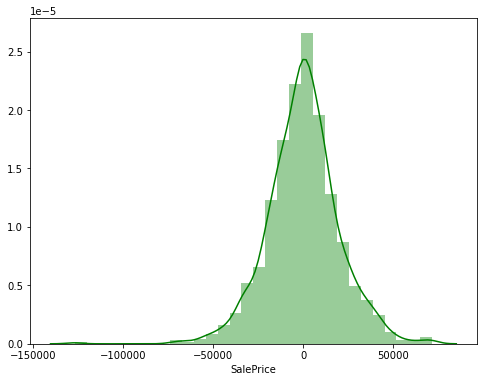

In [163]:
# Checking for Normality of Errors

fig = plt.figure(figsize=(8,6))

sns.distplot(residuals, axlabel='SalePrice', bins=30, color='green')

## Comments:

---

Based on the histogram, the residuals look approximately normally distributed, with some left skewness, so our data was probably alright.

## Homoscedasticity 

In [164]:
# Getting Predictions

predictions = optimised_lasso.predict(X_train_sc).reshape(1039,1)
display(predictions)

array([[200390.284568  ],
       [139881.2764538 ],
       [135030.59759135],
       ...,
       [ 85986.00870756],
       [ 99875.85103607],
       [266438.31934617]])

Text(0, 0.5, 'Residual')

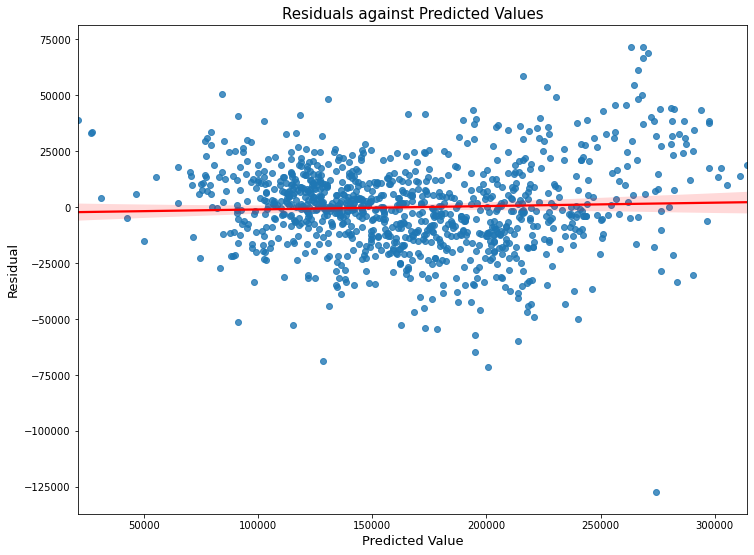

In [165]:
# Checking for Homoscedasticity

fig, ax = plt.subplots(figsize=(12,9))

sns.regplot(x=predictions, y=residuals, lowess=False, line_kws={'color':'red'})

ax.set_title('Residuals against Predicted Values', fontsize=15)
ax.set_xlabel('Predicted Value', fontsize=13)
ax.set_ylabel('Residual', fontsize=13)

## Comments:

---

Based on the scatterplot, there does not appear to be any funnel-shape, suggesting that the regression does not predict certain values of X more accurately than others.

There seems to be one exceptional point with residual < -125 000, and predicted value > 250 000.

Overall, it appears that the assumption of Homoscedasticity has been met.

<a id='7'></a>

# 7. Kaggle Submission

In [166]:
# Scaling

test_encoded_sc = ss.fit_transform(test_encoded)

In [167]:
# Making Kaggle Prediction

kaggle_predictions = optimised_lasso.predict(test_encoded_sc)
display(kaggle_predictions)

array([118933.40676776, 157313.41453413, 164994.39657973, ...,
       139414.75789645, 125302.46505787, 200300.23847979])

In [168]:
test['Id'].values

array([1461, 1462, 1463, ..., 2917, 2918, 2919], dtype=int64)

In [169]:
# Creating DataFrame to store predictions

kaggle_submission = pd.DataFrame({'Id':test['Id'].values, 
                                  'SalePrice':kaggle_predictions})

In [170]:
# Viewing DataFrame

kaggle_submission

Id      SalePrice
0     1461  118933.406768
1     1462  157313.414534
2     1463  164994.396580
3     1464  176205.314494
4     1465  200465.940559
...    ...            ...
1454  2915   86714.322036
1455  2916   86463.048334
1456  2917  139414.757896
1457  2918  125302.465058
1458  2919  200300.238480

[1459 rows x 2 columns]

In [171]:
# Saving DataFrame to CSV for submission

#kaggle_submission.to_csv('./datasets/kaggle_submission.csv', index=False)

## Kaggle Score

<img src='./images/kaggle_score.PNG'>

<a id='8'></a>

# 8. Credits
[Banner Image](#banner-image): <a href='https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png'>Google Cloud</a>

In [172]:
# Getting the runtime of notebook

print(f"Run complete, total time taken \u2248 {time.time()-t0:.2f}s")

Run complete, total time taken ≈ 13.86s
